In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df1=pd.read_csv('data (1).csv')
df1.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2.0,9.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.shape

(285332, 70)

In [ ]:
df=df1.loc[:,df1.columns!='accident_index']
df2=df.loc[:,df.columns!='local_authority_(highway)']
df3=df2.loc[:,df2.columns!='lsoa_of_accident_location']
df4=df3.loc[:,df3.columns!='date']
df5=df4.loc[:,df4.columns!='time']

In [ ]:
df6=df5.fillna(0)

In [ ]:
Y_mnl=df6['accident_severity']#Response
X_mnl=df6.drop(['accident_severity'],1) #predictors

X_train_mnl ,X_test_mnl,y_train_mnl,y_test_mnl=train_test_split(X_mnl,Y_mnl,test_size=0.3,random_state=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
print(X_train_mnl.shape)
print(X_test_mnl.shape)


(199732, 64)
(85600, 64)


In [ ]:
print(y_test_mnl.shape)
print(y_train_mnl.shape)

(85600,)
(199732,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(n_estimators=100)

In [ ]:

model_RF.fit(X_train_mnl,y_train_mnl)
print(f'Model Accuracy: {model_RF.score(X_train_mnl,y_train_mnl)}')
n_nodes=[]
max_depth=[]
for ind_tree in model_RF.estimators_:
  n_nodes.append(ind_tree.tree_.node_count)
  max_depth.append(ind_tree.tree_.max_depth)
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth{int(np.mean(max_depth))}')

Model Accuracy: 0.9999949932910099
Average number of nodes 29932
Average maximum depth48


In [ ]:
y_test_mnl1=model_RF.predict(X_train_mnl)

In [ ]:
from sklearn import metrics

In [ ]:
pred=model_RF.predict(X_test_mnl)

In [ ]:
print(pred.shape)
print(y_test_mnl1.shape)

(85600,)
(199732,)


In [ ]:
y_train_mnl.shape


(199732,)

In [ ]:
y_test_mnl.shape

(85600,)

In [ ]:
print("Accuracy Of The Model: ",metrics.accuracy_score(y_test_mnl,pred))

Accuracy Of The Model:  0.9410514018691589


In [ ]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
pred=model_RF.predict(X_test_mnl)
print(metrics.accuracy_score(pred,y_test_mnl))
cm=metrics.confusion_matrix(pred,y_test_mnl)
print(cm)

0.9410514018691589
[[    0     0     0     0]
 [    0   664     0     1]
 [    1   108  7172    10]
 [    0   347  4579 72718]]


In [ ]:
cm=confusion_matrix(y_test_mnl,pred,labels=None)
print(confusion_matrix)

<function confusion_matrix at 0x7fc208f3f950>


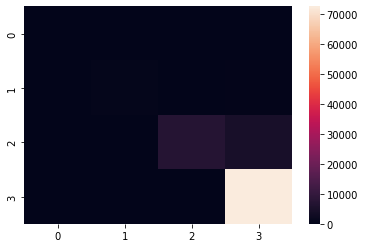

In [ ]:
import seaborn
seaborn.heatmap(cm)
plt.show()


# **DECISION TREE**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('data (1).csv')
df1.head(2)

FileNotFoundError: ignored

In [ ]:
df1.shape

(285332, 70)

In [ ]:
df=df1.loc[:,df1.columns!='accident_index']

In [ ]:
df2=df.loc[:,df.columns!='local_authority_(highway)']
df3=df2.loc[:,df2.columns!='lsoa_of_accident_location']
df4=df3.loc[:,df3.columns!='date']
df5=df4.loc[:,df4.columns!='time']
df6=df5.fillna(0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_RF = DecisionTreeClassifier(random_state=0)
model_RF.fit(X_train_mnl, y_train_mnl)
print(f'Decision tree has {model_RF.tree_.node_count} nodes with maximum depth {model_RF.tree_.max_depth}.')
print(f'Model Accuracy: {model_RF.score(X_train_mnl, y_train_mnl)}')

Decision tree has 27349 nodes with maximum depth 50.
Model Accuracy: 1.0


In [ ]:
from sklearn import metrics
pred = model_RF.predict(X_test_mnl)
print(metrics.accuracy_score(pred,y_test_mnl))
cm6 = metrics.confusion_matrix(pred,y_test_mnl)
print(cm6)

0.8991939252336448
[[    0     0     0     0]
 [    0   720   190   285]
 [    0   165  7980  4173]
 [    1   234  3581 68271]]


In [ ]:
train_probs = model_RF.predict_proba(X_train_mnl)
test_probs = model_RF.predict_proba(X_test_mnl)
train_predictions = model_RF.predict(X_train_mnl)
test_pred = model_RF.predict(X_test_mnl)

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
print('AUC(train): %.2f' % (roc_auc_score(y_train_mnl, train_probs, multi_class='ovr', average='weighted')))
print('AUC(test): %.2f' % (roc_auc_score(y_test_mnl,test_probs,multi_class='ovr',average='weighted')))
print('Recall(train): %.2f' % (recall_score(y_train_mnl,train_predictions,average='weighted')))
print('Recall(test): %.2f' % (recall_score(y_test_mnl,test_pred,average='weighted')))
print('Precision(train): %.2f' % (precision_score(y_train_mnl,train_predictions,average='weighted')))
print('Precision(test): %.2f' % (precision_score(y_test_mnl,test_pred,average='weighted')))
print('F1 Score(train): %.2f' % (2*((precision_score(y_train_mnl,train_predictions,average='weighted')*(recall_score(y_train_dt,train_predictions,average='weighted')))/((precision_score(y_train_dt,train_predictions,average='weighted')+(recall_score(y_train_dt,train_predictions,average='weighted')))))))
print('F1 Score(test): %.2f' % (2*((precision_score(y_test_mnl,test_pred,average='weighted')*(recall_score(y_test_dt,test_pred,average='weighted')))/((precision_score(y_test_dt,test_pred,average='weighted')+(recall_score(y_test_dt,test_pred,average='weighted')))))))

In [ ]:
import sklearn.tree
fig = plot.subplots(figsize=(10,10))
fulltree=sklearn.tree.plot_tree(model_RF,max_depth=19,feature_names=X_dt.columns,class_names=['1','2','3'],filled=True,rounded=True)

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df1 = pd.read_csv('data (1).csv')
df1.head(10)

FileNotFoundError: ignored